In [1]:
import graph
import powerlaw
import networkx as nx
import matplotlib.pyplot as plt

# 1 Introduction

The notebook utilize Karen Spilka as a starting point to iteratively construct a network of environmental influence within Massachusetts. Subsequently, the network is visualized and analyzed for further insights.

## 1.1 Assumptions
- Five type of nodes: Policy, Politician, Committee, Donor, Interest Group.
    - The policies (bills) are all environment-related in recent years.
- Five type of edges (relations): Vote, Sponsor, Concensus, Donate, Rate.
- The graph is weighted and directed.
    - The weights of Donate edges and Rate edges are normalized to between 0 and 1 using min-max scaling, respectively. 
    - The weight of concensus is set to 1 if the two politicians who support the the same policy belong to the same party; otherwise, it is set to 0.5.
    - The default weight for other edges is 1.

## 1.2 Analysis Objectives
- Structural evolution in the process of graph construction.
    - Refer to [graph_construct_diagrams](graph_construct_diagrams) folder for details.
- Influence study using centrality metrics
    - Degree centrality: measures the number of edges connected to a node. It is defined as the number of edges connected to a node divided by the maximum possible edges that the node could have.
    - Betweenness centrality: measures the number of times a node acts as a bridge along the shortest path between two other nodes. It is defined as the number of shortest paths going through a node divided by the total number of shortest paths.
    - Closeness centrality: measures how easily a node in a network can access all other nodes in the network. It is calculated as the inverse of the average shortest path length from the node to all other nodes in the network. Nodes with high closeness centrality are able to access other nodes more efficiently than nodes with low closeness centrality. 
    - PageRank centrality: computes a ranking of the nodes in the graph based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages.
- Sensitivity analysis
- Community detection

# 2 Graph Construction

## 2.1 First Iteration
- Scrape the environment bills for which Karen Spilka votes yes since 2021, create the corresponding nodes and edges.
- Scrape her campagin donors, create the corresponding nodes and edges (donation amount >= 2000).
- Scrape the interest groups that endorse her, create the corresponding nodes and edges (rating >= 60).

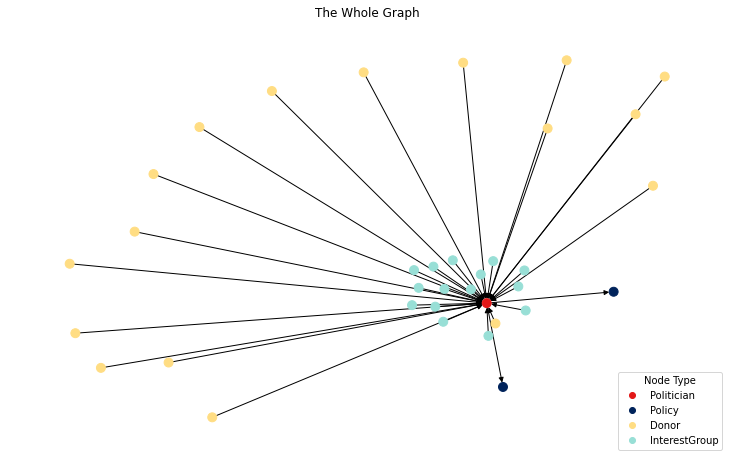

In [2]:
name='Karen Spilka'
state='MA'

directory = 'processed_data/MA/first_iter'
all_nodes, all_edges = graph.read_pkl(directory)
# create empty directed graph
DiG = nx.DiGraph()
# define a color map for different node types
color_map={'Politician':'#E21818', 'Policy':'#00235B', 'Donor':'#FFDD83', 'InterestGroup':'#98DFD6'}
graph.draw_whole_graph(DiG, all_nodes, all_edges, color_map)

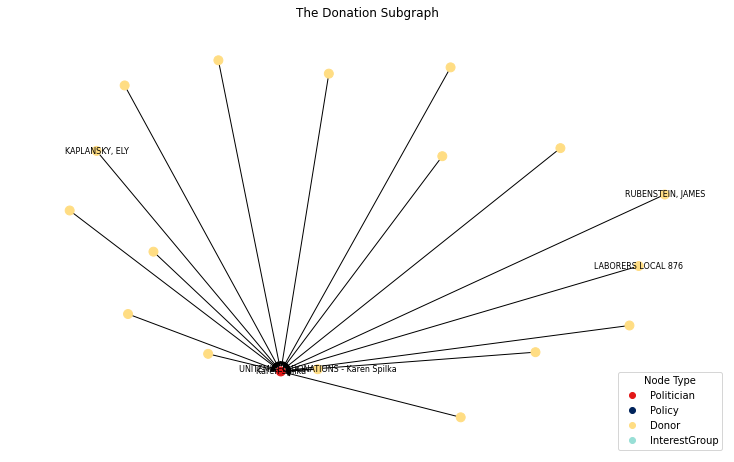

In [3]:
graph.draw_donation_graph(DiG, color_map)

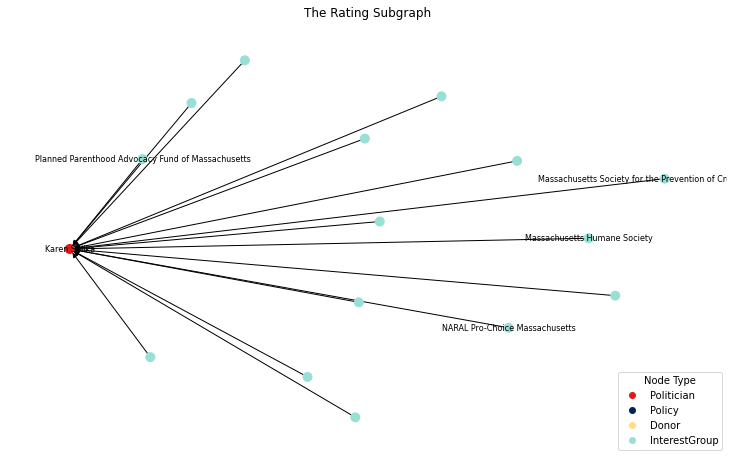

In [4]:
graph.draw_rating_graph(DiG, color_map)

In [5]:
dc1, bc1, cc1, pc1 = graph.centrality(DiG, politician_name=name, state=state, top_n=10)

Centrality Metrics of the Karen Spilka (MA) Network

Degree Centrality
-----------------
Karen Spilka: 1.0
UNITEMIZED DONATIONS - Karen Spilka: 0.029411764705882353
KAPLANSKY, ELY: 0.029411764705882353
LABORERS LOCAL 876: 0.029411764705882353
RUBENSTEIN, JAMES: 0.029411764705882353
SHEEHAN, GERALD V: 0.029411764705882353
CONSTRUCTION & GENERAL LABORERS LOCAL 385: 0.029411764705882353
KEROACK, MARK A: 0.029411764705882353
MARSH, STEVEN C: 0.029411764705882353
SALOIS, R JOSEPH: 0.029411764705882353

Betweenness Centrality
----------------------
Karen Spilka: 0.0570409982174688
UNITEMIZED DONATIONS - Karen Spilka: 0.0
KAPLANSKY, ELY: 0.0
LABORERS LOCAL 876: 0.0
RUBENSTEIN, JAMES: 0.0
SHEEHAN, GERALD V: 0.0
CONSTRUCTION & GENERAL LABORERS LOCAL 385: 0.0
KEROACK, MARK A: 0.0
MARSH, STEVEN C: 0.0
SALOIS, R JOSEPH: 0.0

Closeness Centrality
--------------------
Karen Spilka: 0.9411764705882353
H 5060: 0.4927601809954751
S 2995: 0.4927601809954751
UNITEMIZED DONATIONS - Karen Spilka: 0.0
KAPLA

## 2.2 Second Iteration
- Scrape the second depth politicians/committees who are the sponsors of the environment bills for which Karen Spilka votes yes since 2021.
- Create the edges between the second depth politicians/committees and the bills they sponsor.
- Create the edges between the second depth politicians who sponsor the same bill.

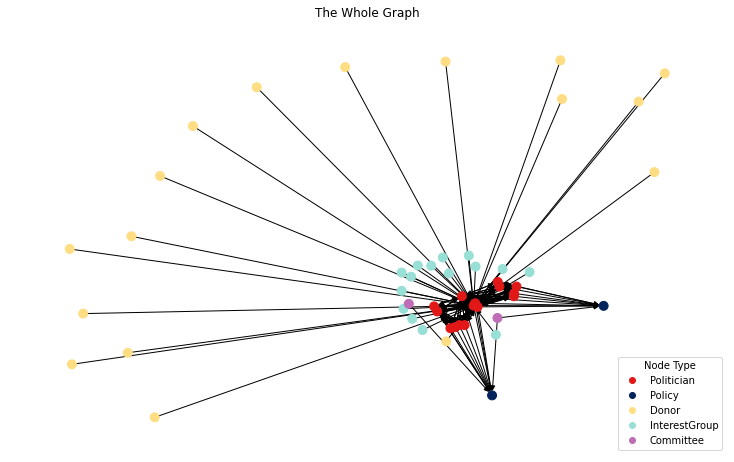

In [6]:
directory = 'processed_data/MA/second_iter'
new_nodes, new_edges = graph.read_pkl(directory)
# update the color map to include new node_type
color_map['Committee'] = '#BE6DB7'
graph.draw_whole_graph(DiG, new_nodes, new_edges, color_map)

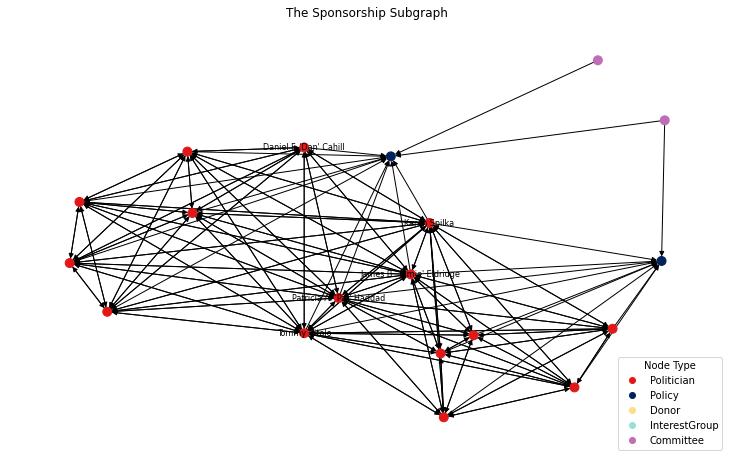

In [7]:
graph.draw_sponsorship_graph(DiG, color_map)

In [8]:
dc2, bc2, cc2, pc2 = graph.centrality(DiG, politician_name=name, state=state, top_n=10)

Centrality Metrics of the Karen Spilka (MA) Network

Degree Centrality
-----------------
Karen Spilka: 1.24
James B. 'Jamie' Eldridge: 0.6
Patricia A. 'Pat' Haddad: 0.6
Tommy Vitolo: 0.6
Daniel F. 'Dan' Cahill: 0.38
Michelle L. Ciccolo: 0.38
Mindy Domb: 0.38
Dylan Andreo Fernandes: 0.38
Kay S. Khan: 0.38
Lindsay N. Sabadosa: 0.38

Betweenness Centrality
----------------------
Karen Spilka: 0.21622448979591838
James B. 'Jamie' Eldridge: 0.007244897959183674
Patricia A. 'Pat' Haddad: 0.007244897959183674
Tommy Vitolo: 0.007244897959183674
UNITEMIZED DONATIONS - Karen Spilka: 0.0
KAPLANSKY, ELY: 0.0
LABORERS LOCAL 876: 0.0
RUBENSTEIN, JAMES: 0.0
SHEEHAN, GERALD V: 0.0
CONSTRUCTION & GENERAL LABORERS LOCAL 385: 0.0

Closeness Centrality
--------------------
Karen Spilka: 0.92
H 5060: 0.5583720930232559
James B. 'Jamie' Eldridge: 0.5425641025641026
Patricia A. 'Pat' Haddad: 0.5425641025641026
Tommy Vitolo: 0.5425641025641026
S 2995: 0.535813953488372
Daniel F. 'Dan' Cahill: 0.50987951807228

## 2.3 Third Iteration
- Scrape the campagin donors for each second depth politician, create the corresponding nodes and edges (donation amount >= 2000).

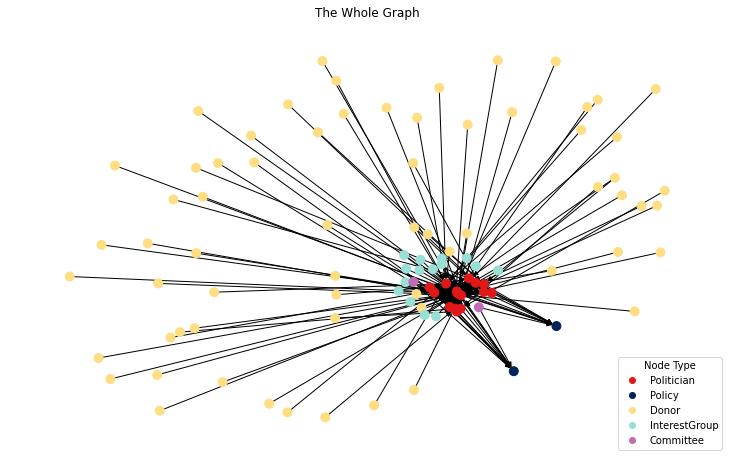

In [9]:
directory = 'processed_data/MA/third_iter'
new_nodes, new_edges = graph.read_pkl(directory)
graph.draw_whole_graph(DiG, new_nodes, new_edges, color_map)

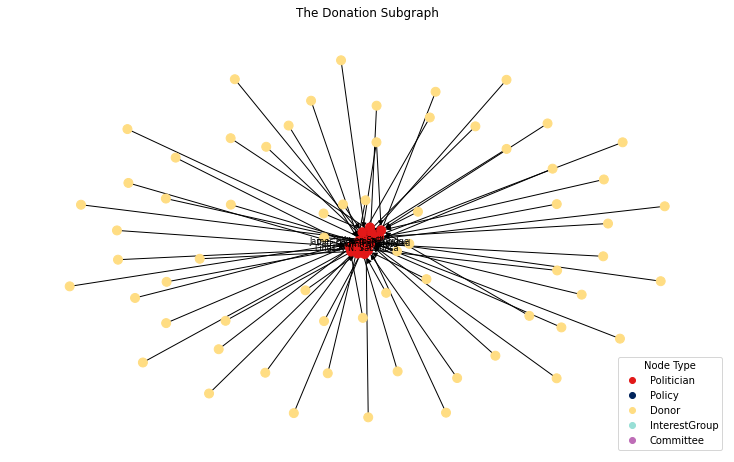

In [10]:
graph.draw_donation_graph(DiG, color_map)


In [11]:
dc3, bc3, cc3, pc3 = graph.centrality(DiG, politician_name=name, state=state, top_n=10)

Centrality Metrics of the Karen Spilka (MA) Network

Degree Centrality
-----------------
Karen Spilka: 0.6326530612244897
James B. 'Jamie' Eldridge: 0.42857142857142855
Tommy Vitolo: 0.4081632653061224
Patricia A. 'Pat' Haddad: 0.31632653061224486
Lindsay N. Sabadosa: 0.24489795918367346
Michelle L. Ciccolo: 0.22448979591836732
Mindy Domb: 0.22448979591836732
Michael J. 'Mike' Barrett: 0.22448979591836732
Bradley H. 'Brad' Jones Jr.: 0.22448979591836732
Daniel F. 'Dan' Cahill: 0.2040816326530612

Betweenness Centrality
----------------------
Karen Spilka: 0.059988428361035136
James B. 'Jamie' Eldridge: 0.026325478645066274
Tommy Vitolo: 0.022959183673469385
Lindsay N. Sabadosa: 0.008415737428992215
Michael J. 'Mike' Barrett: 0.008415737428992215
Patricia A. 'Pat' Haddad: 0.0078108563012834
Bradley H. 'Brad' Jones Jr.: 0.0075215653271617925
Michelle L. Ciccolo: 0.005049442457395329
Mindy Domb: 0.005049442457395329
Brendan P. Crighton: 0.002472122869766463

Closeness Centrality
---------

## 2.4 Fourth Iteration
- Scrape the interest groups that endorse each second depth politician, create the corresponding nodes and edges (rating >= 60).

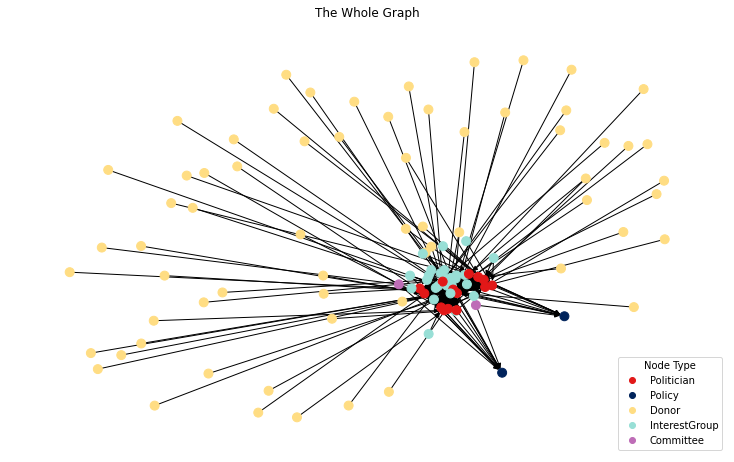

In [12]:
directory = 'processed_data/MA/fourth_iter'
new_nodes, new_edges = graph.read_pkl(directory)
graph.draw_whole_graph(DiG, new_nodes, new_edges, color_map)

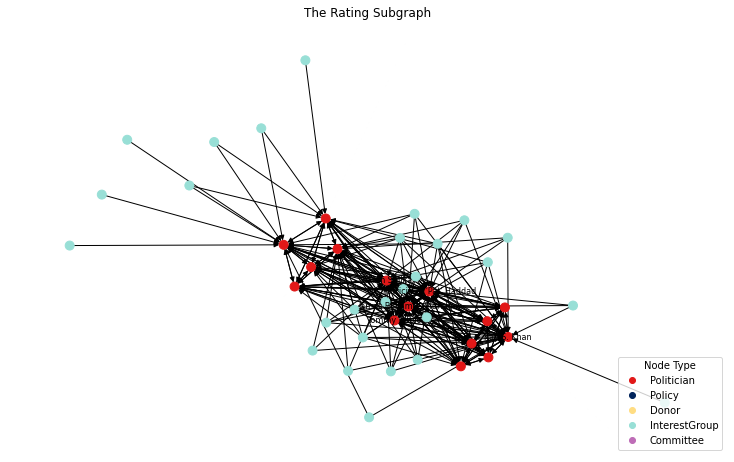

In [13]:
graph.draw_rating_graph(DiG, color_map)

In [14]:
dc4, bc4, cc4, pc4 = graph.centrality(DiG, politician_name=name, state=state, top_n=10)

Centrality Metrics of the Karen Spilka (MA) Network

Degree Centrality
-----------------
Karen Spilka: 0.5636363636363636
James B. 'Jamie' Eldridge: 0.5181818181818182
Patricia A. 'Pat' Haddad: 0.40909090909090906
Tommy Vitolo: 0.39999999999999997
Kay S. Khan: 0.35454545454545455
Bradley H. 'Brad' Jones Jr.: 0.3090909090909091
Cynthia Stone 'Cindy' Creem: 0.3
Michael J. 'Mike' Barrett: 0.2636363636363636
Dylan Andreo Fernandes: 0.2545454545454545
Lindsay N. Sabadosa: 0.2545454545454545

Betweenness Centrality
----------------------
Karen Spilka: 0.031898870752081754
James B. 'Jamie' Eldridge: 0.02489859274262944
Tommy Vitolo: 0.019446364033519997
Bradley H. 'Brad' Jones Jr.: 0.012724492632749513
Patricia A. 'Pat' Haddad: 0.00983187047407231
Michael J. 'Mike' Barrett: 0.006918331413744258
Lindsay N. Sabadosa: 0.0067055879899916605
Kay S. Khan: 0.004431934019089982
Michelle L. Ciccolo: 0.004036697247706422
Mindy Domb: 0.004036697247706422

Closeness Centrality
--------------------
Karen 

# 3 Power Law
- Power law is a type of distribution that is commonly observed in real-world networks, including social networks. Since the construction of our network is based on subjective choices, it can be challenging to ensure that the network accurately reflects the characteristics of a real social network. By analyzing the degree distribution of the network and fitting it to a power law, we can assess how representative the constructed network is of a real social network.
- The figure shows that our network follows the power law, meaning that most nodes have a relatively small degree (fewer edges), while only a few nodes have a large degree. 
- Notably, the tail of the degree distribution contains mostly politicians with high degrees, appearing more frequently than expected under a power law distribution. This suggests that our assumption when constructing the network, which links politicians who support the same bill and assumes they must be related, may have overestimated the actual situation.

Calculating best minimal value for power law fit


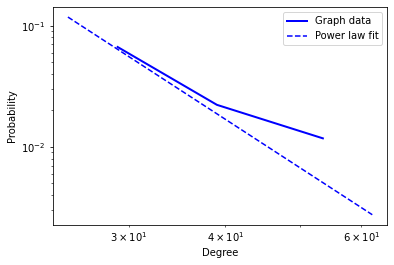

In [15]:
graph.plot_power_law(DiG)

# 4 Sensitivity Analysis
- Use the first iteration as the benchmark; use the Jaccard Similarity Index to measure the similarity of different iterative processes and the benchmark.
- Due to local computing power limitations, it is not feasible to calculate sensitivity analysis with each new node added. Instead, nodes of the same type are added for each iteration, allowing for sensitivity analysis to be performed on an iterative basis. 
- It is worth noting that some metrics become stable from the second iteration, while others become stable from the third. This suggests that structural changes in the graph have varying effects on different metrics.

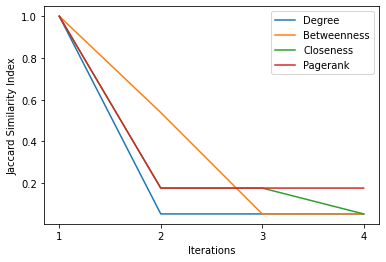

In [16]:
y1 = graph.calculate_y(dc1, dc2, dc3, dc4)
y2 = graph.calculate_y(bc1, bc2, bc3, bc4)
y3 = graph.calculate_y(cc1, cc2, cc3, cc4)
y4 = graph.calculate_y(pc1, pc2, pc3, pc4)

y_lst = [y1, y2, y3, y4]
x = [1, 2, 3, 4]

graph.plot_sensitivity(x, y_lst)

# 5 Centality Metrics Comparison
- Use the fourth iteration network as the basis for the comparison
- Compare the ranking of the top-10 nodes obtained from the different centrality metrics through Jaccard Similarity Index heatmaps.
- The heatmaps will display a value for each pair of centrality metrics, with a higher index indicating a more similar ranking of nodes.

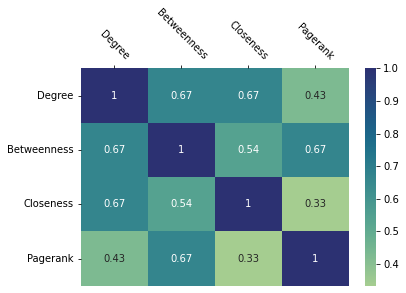

In [17]:
metrics = {'Degree':set(dc4), 'Betweenness':set(bc4), 'Closeness':set(cc4), 'Pagerank':set(pc4)}
jaccard_mat = graph.jaccard_sim(list(metrics.values()))
graph.plot_heatmap(jaccard_mat, list(metrics.keys()))

# 6 Community Detection 
- Analyze on the fourth iteration network.
- Apply Louvain Community Detection Algorithm to identify communities of nodes that share similar characteristics. 
- While most nodes of the same type were in the same community, some exceptions were found. For example, if a community had a mix of individual politicians and interest groups, it might indicate underlying connections or relationships.

In [18]:
graph.community_detection(DiG)

Community 0: ['UNITEMIZED DONATIONS - Karen Spilka', 'KAPLANSKY, ELY', 'LABORERS LOCAL 876', 'RUBENSTEIN, JAMES', 'SHEEHAN, GERALD V', 'CONSTRUCTION & GENERAL LABORERS LOCAL 385', 'KEROACK, MARK A', 'MARSH, STEVEN C', 'SALOIS, R JOSEPH', 'CARNEY, CHRIS', 'CONNOLLY JR, CHRISTOPHER', 'BURKE, TIMOTHY', 'SEETHARAMAN, RAMACHANDRAN', 'MCBRIDE, ROB', 'LABORERS INTERNATINAL UNION OF NORTH AMERICA LOCAL 151', 'CONSTRUCTION & GENERAL LABORERS LOCAL 22', 'NORTHEAST REGIONAL COUNCIL OF SMART SPECIAL GENERAL FUND LU17', 'Planned Parenthood Advocacy Fund of Massachusetts', 'Mass Voters for Clean Elections', 'Massachusetts Audubon Society', 'Common Cause Massachusetts', 'Massachusetts AFL-CIO', 'Progressive Massachusetts', 'Massachusetts National Organization for Women', 'S 2995', 'Karen Spilka', 'Ways and Means Committee', "Patricia A. 'Pat' Haddad", "Michael J. 'Mike' Barrett", "Cynthia Stone 'Cindy' Creem", 'Brendan P. Crighton', "UNITEMIZED DONATIONS - Patricia A. 'Pat' Haddad", "UNITEMIZED DONAT

In [19]:
# graph.save_node_neighbors(DiG, node_type='Donor', path='processed_data/MA_Donor_breakdown.csv')
# graph.save_node_neighbors(DiG, node_type='InterestGroup', path='processed_data/MA_InterestGroup_breakdown.csv')